In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
file_path = "./dataset.csv"
df_mobile_data = pd.read_csv(file_path)
print(f"Length of data: {df_mobile_data.shape[0]} rows x {df_mobile_data.shape[1]} columns")


Length of data: 4000 rows x 24 columns


In [3]:
df_mobile_data.head()

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
0,842,9,756,188,7,5,0,20,1,19,...,2016,2549,1,2,0,0,2.2,0,0,1
1,1021,17,1988,136,53,2,1,905,0,7,...,2019,2631,0,3,1,1,0.5,1,1,2
2,563,11,1716,145,41,1,1,1263,0,9,...,2016,2603,2,5,1,1,0.5,1,1,2
3,615,16,1786,131,10,2,0,1216,0,11,...,2016,2769,0,6,1,1,2.5,0,0,2
4,1821,8,1212,141,44,5,1,1208,0,15,...,2020,1411,13,2,1,1,1.2,1,0,1


In [4]:
df_mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_mAh         4000 non-null   int64  
 1   screen_height_cm    4000 non-null   int64  
 2   screen_width_px     4000 non-null   int64  
 3   weight_g            4000 non-null   int64  
 4   internal_memory_GB  4000 non-null   int64  
 5   color_variety       4000 non-null   int64  
 6   has_4g              4000 non-null   int64  
 7   screen_height_px    4000 non-null   int64  
 8   has_wifi            4000 non-null   int64  
 9   talk_time_hr        4000 non-null   int64  
 10  primary_camera_mp   4000 non-null   int64  
 11  brand_popularity    4000 non-null   int64  
 12  thickness_cm        4000 non-null   float64
 13  screen_width_cm     4000 non-null   int64  
 14  year_release        4000 non-null   int64  
 15  ram_MB              4000 non-null   int64  
 16  front_

In [5]:
df_mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_mAh,4000.0,1238.51850,439.363262,501.0,851.75,1226.0,1615.25,1998.0
screen_height_cm,4000.0,12.30650,4.212718,5.0,9.00,12.0,16.00,19.0
screen_width_px,4000.0,1251.51550,432.145405,500.0,874.75,1247.0,1633.00,1998.0
weight_g,4000.0,140.24900,35.395229,80.0,109.00,141.0,170.00,200.0
internal_memory_GB,4000.0,32.04650,18.143446,2.0,16.00,32.0,48.00,64.0
color_variety,4000.0,3.01425,1.433548,1.0,2.00,3.0,4.00,5.0
has_4g,4000.0,0.52150,0.499600,0.0,0.00,1.0,1.00,1.0
screen_height_px,4000.0,645.10800,443.725321,0.0,282.75,564.0,947.25,1960.0
has_wifi,4000.0,0.50700,0.500014,0.0,0.00,1.0,1.00,1.0
talk_time_hr,4000.0,11.01100,5.463272,2.0,6.00,11.0,16.00,20.0


In [6]:
df_mobile_data.isnull().sum()

battery_mAh           0
screen_height_cm      0
screen_width_px       0
weight_g              0
internal_memory_GB    0
color_variety         0
has_4g                0
screen_height_px      0
has_wifi              0
talk_time_hr          0
primary_camera_mp     0
brand_popularity      0
thickness_cm          0
screen_width_cm       0
year_release          0
ram_MB                0
front_camera_mp       0
cpu_cores             0
has_bluetooth         0
has_3g                0
cpu_speed_GHz         0
has_touchscreen       0
has_dual_sim          0
price_range           0
dtype: int64

In [44]:
df_mobile_data.isna().sum()

battery_mAh           0
screen_height_cm      0
screen_width_px       0
weight_g              0
internal_memory_GB    0
color_variety         0
has_4g                0
screen_height_px      0
has_wifi              0
talk_time_hr          0
primary_camera_mp     0
brand_popularity      0
thickness_cm          0
screen_width_cm       0
year_release          0
ram_MB                0
front_camera_mp       0
cpu_cores             0
has_bluetooth         0
has_3g                0
cpu_speed_GHz         0
has_touchscreen       0
has_dual_sim          0
price_range           0
dtype: int64

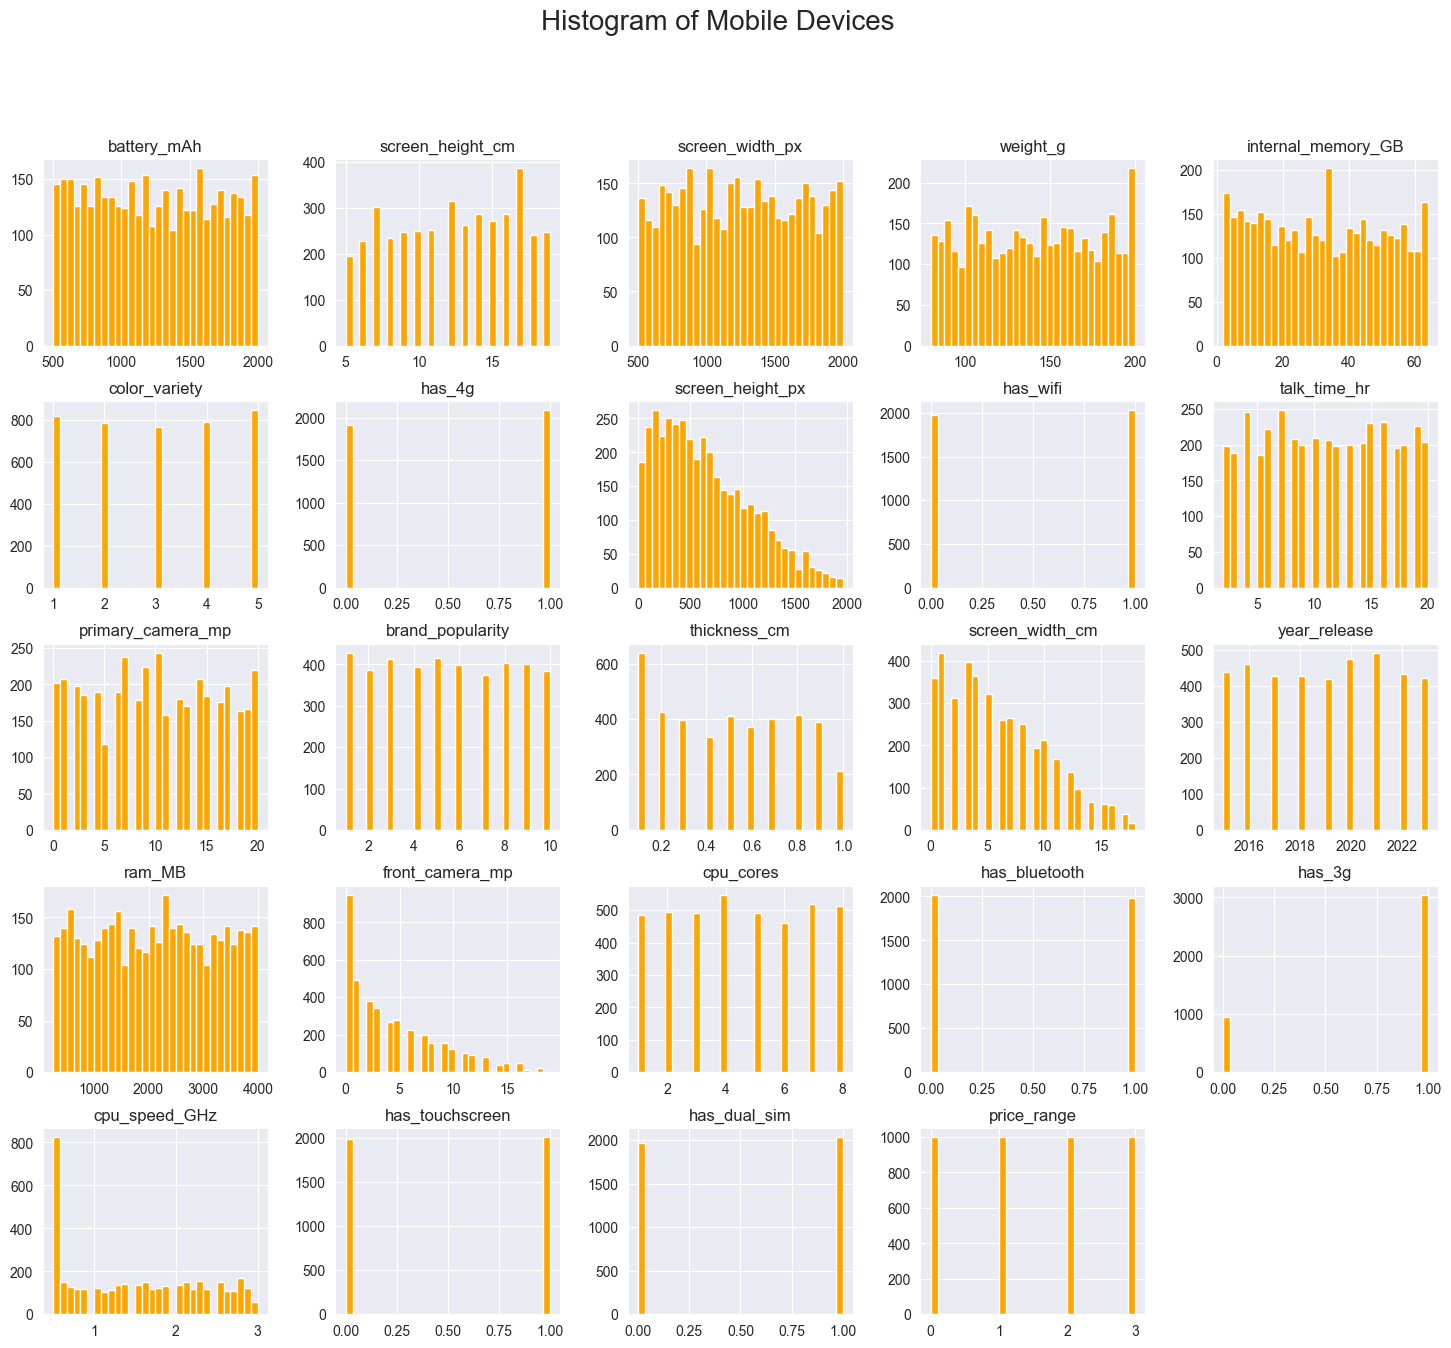

In [8]:
df_mobile_data.hist(figsize=(18,15), bins=30, color='orange')
plt.suptitle('Histogram of Mobile Devices', fontsize=20)
plt.show()

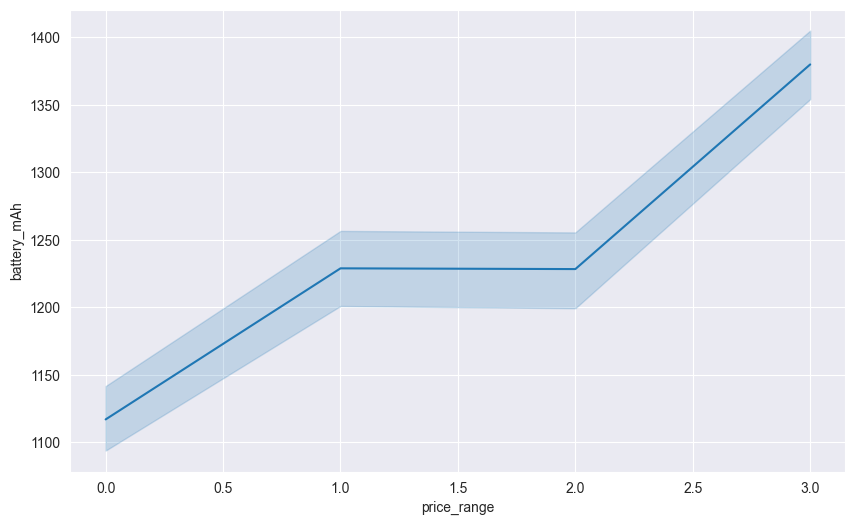

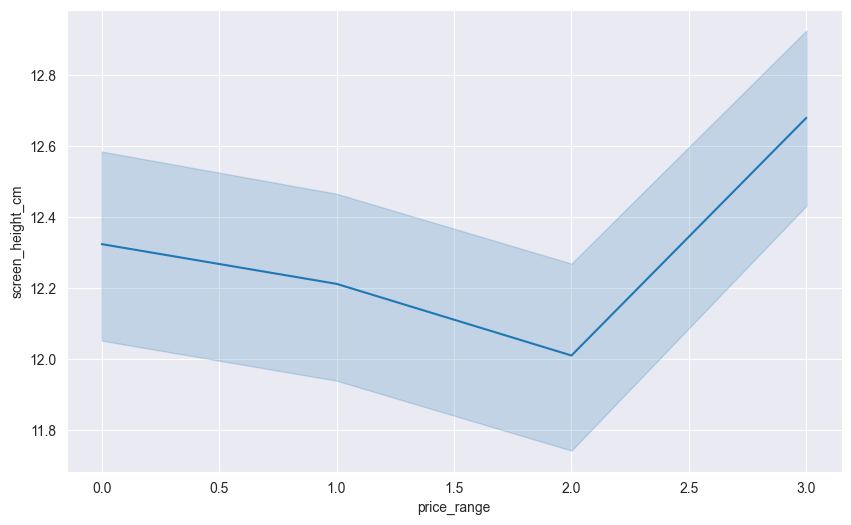

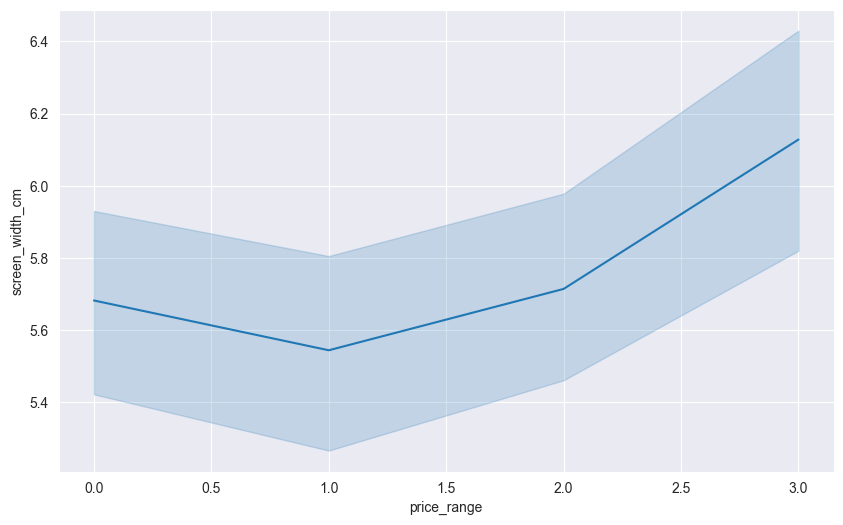

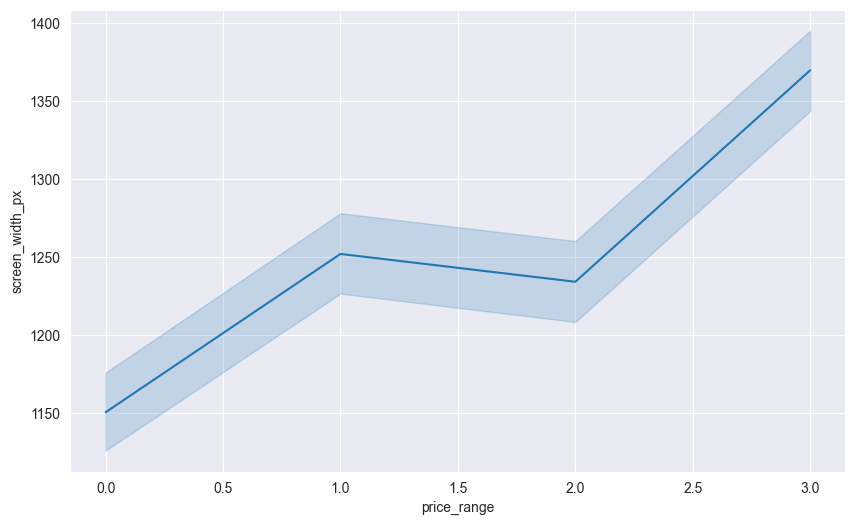

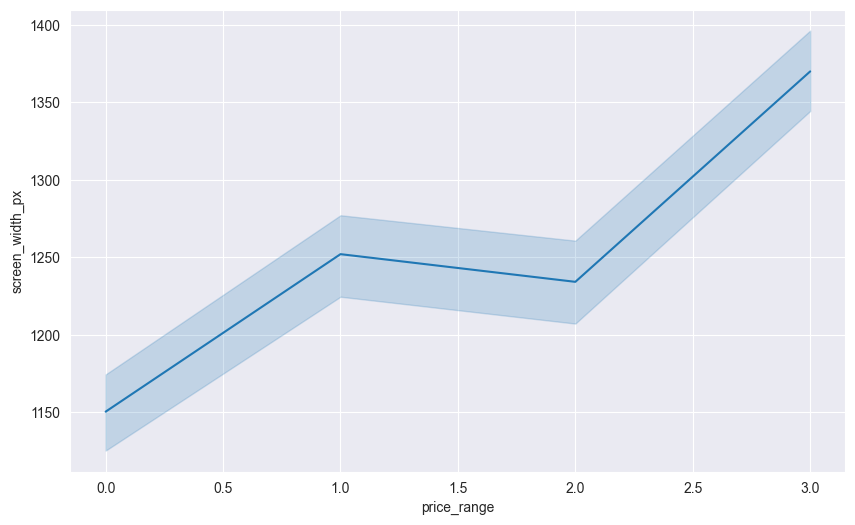

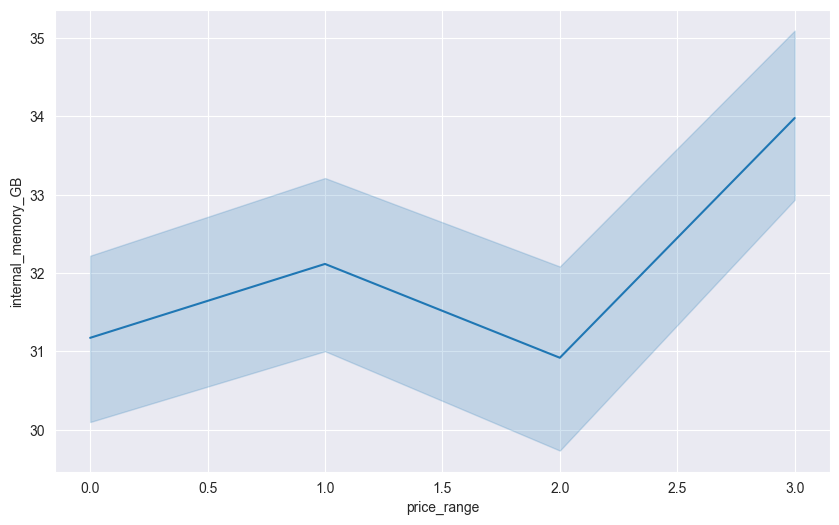

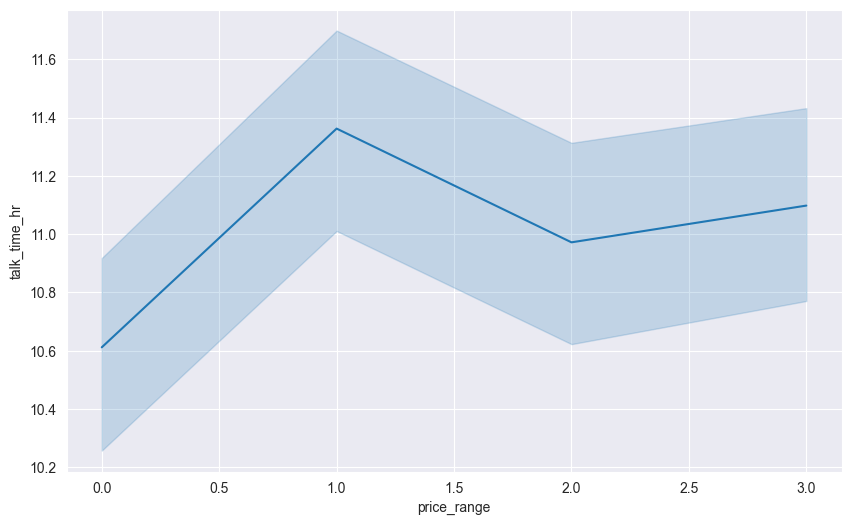

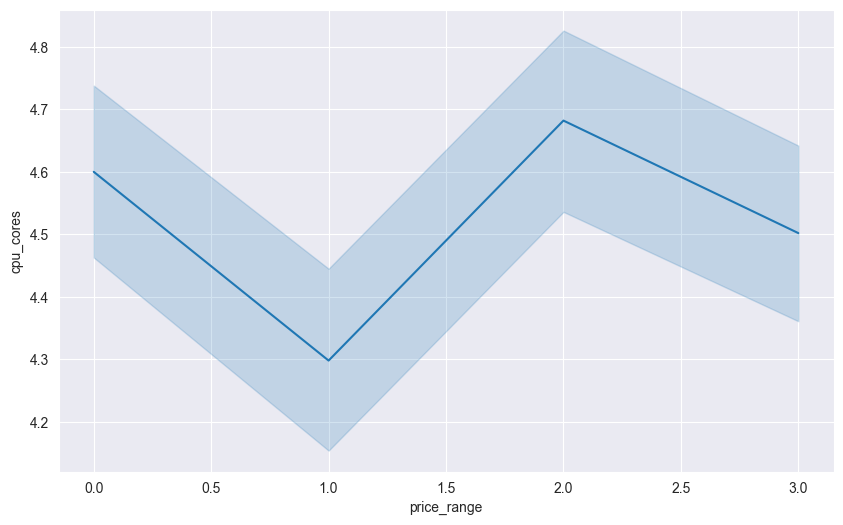

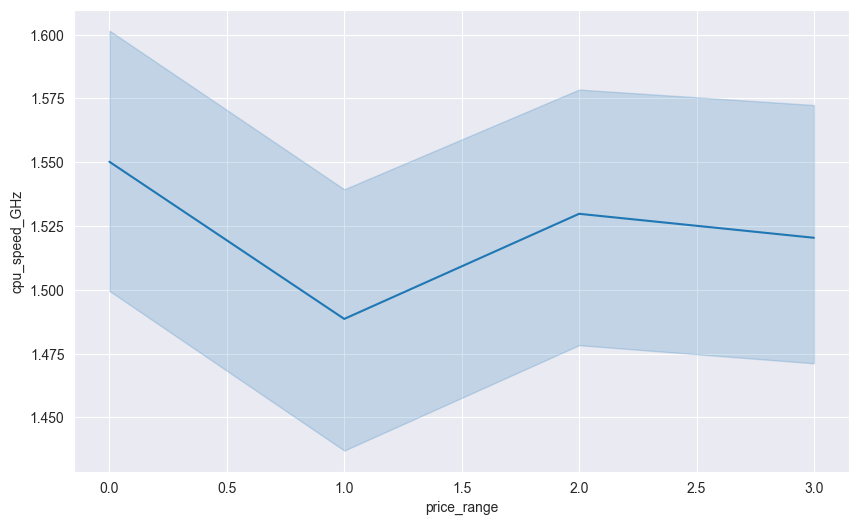

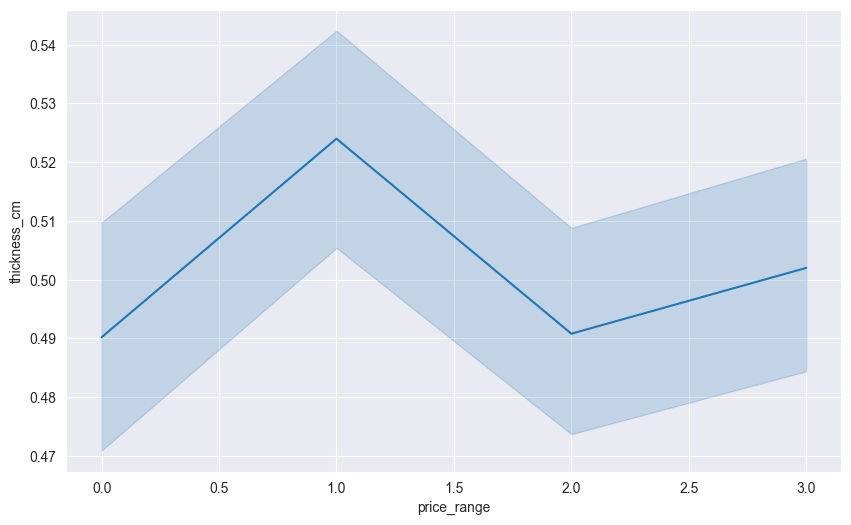

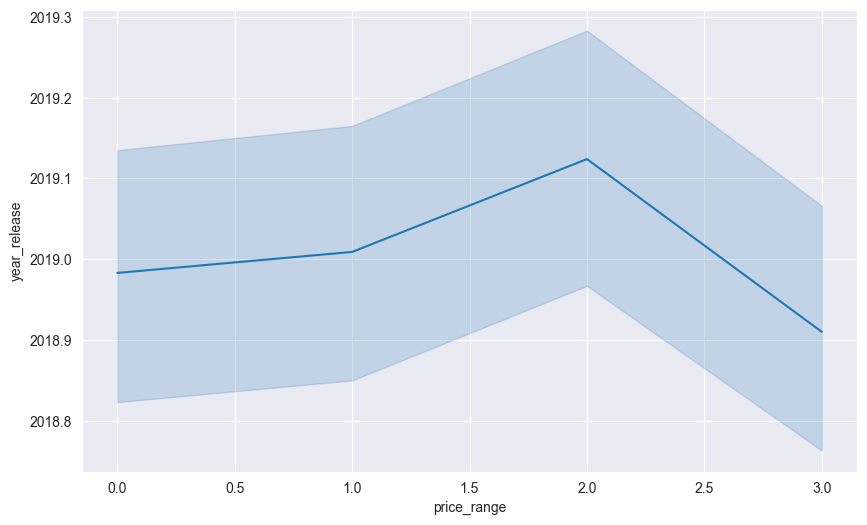

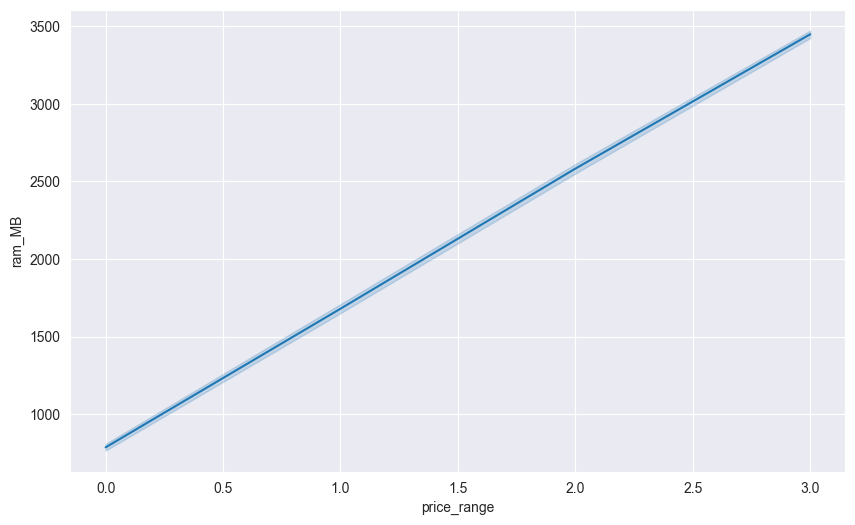

In [9]:
list_1 = ['battery_mAh', 'screen_height_cm', 'screen_width_cm', 'screen_width_px', 'screen_width_px', 'internal_memory_GB', 'talk_time_hr', 'cpu_cores','cpu_speed_GHz','thickness_cm','year_release', 'ram_MB']

for var in list_1:
    plt.figure(figsize=(10, 6))

    sns.lineplot(x = df_mobile_data['price_range'], y = df_mobile_data[var])

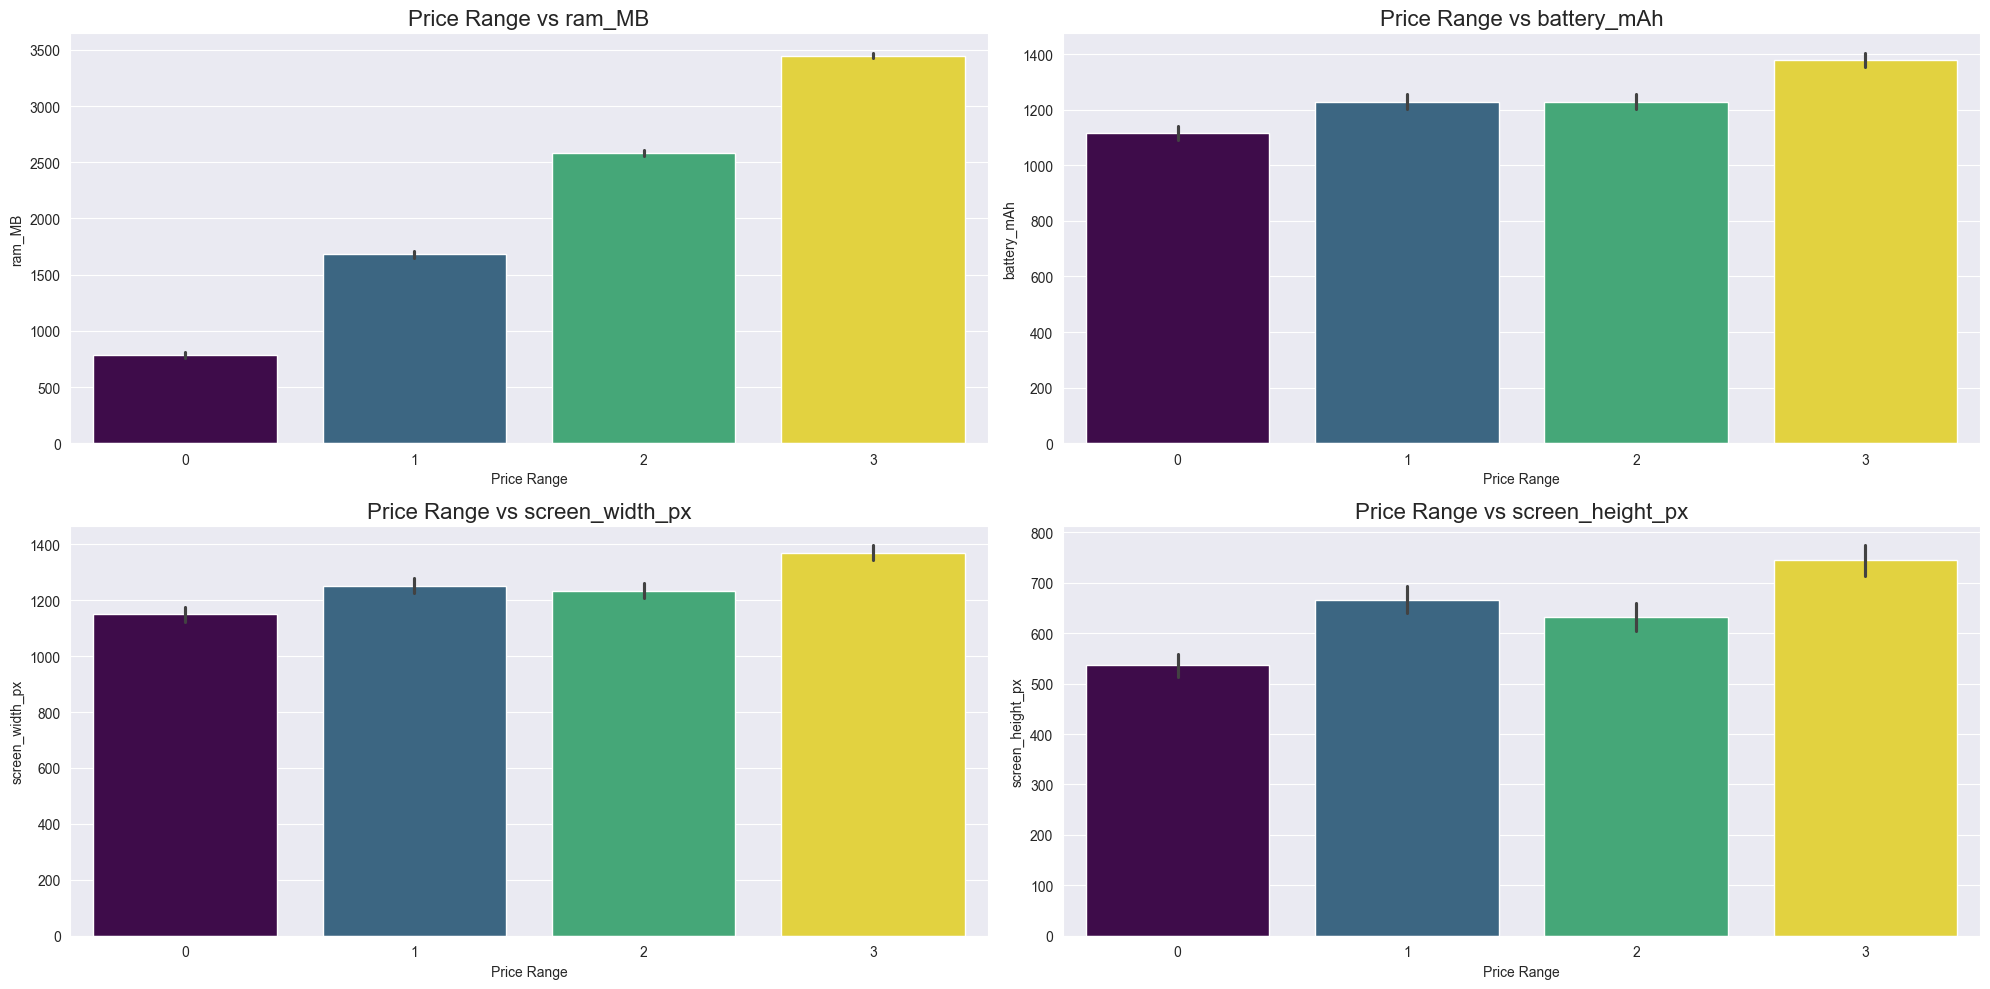

In [10]:
#Relation between ram_MB, Battery_mAh,screen_width_px and screen_height_px

#Plotting price_range vs other features
variables = ['ram_MB', 'battery_mAh', 'screen_width_px', 'screen_height_px']

# Tạo 2 hàng 2 cột subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.ravel()

# Vẽ barplot cho từng feature
for i, feature in enumerate(variables):
    sns.barplot(
        data=df_mobile_data,
        x='price_range',
        y=feature,
        hue='price_range',
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'Price Range vs {feature}', fontsize=16)
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


#Observations
    #Mobiles having ram_MB > 3000 falls under very high cost category. As ram_MB increases, price range also increases
    #Moblies having battery_mAh power > 1300mAh has very high cost
    #Mobiles with more than 700 pixel screen height and width more than 1300 has very high cost.



In [11]:

def show_price_range_info(df_mobile_data):
    price_labels = {
        0: "Low price",
        1: "Medium-low price",
        2: "Medium-high price",
        3: "High price"
    }
    price_range_value = df_mobile_data['price_range'].value_counts().sort_index()
    total_price = len(df_mobile_data)

    for i, count in price_range_value.items():
        label = price_labels.get(i, f"Unknown price range {i}")
        percent = count / total_price * 100
        print(f"{i}: {label} : {count} values ({percent:.1f}%)")

show_price_range_info(df_mobile_data)

0: Low price : 1000 values (25.0%)
1: Medium-low price : 1000 values (25.0%)
2: Medium-high price : 1000 values (25.0%)
3: High price : 1000 values (25.0%)


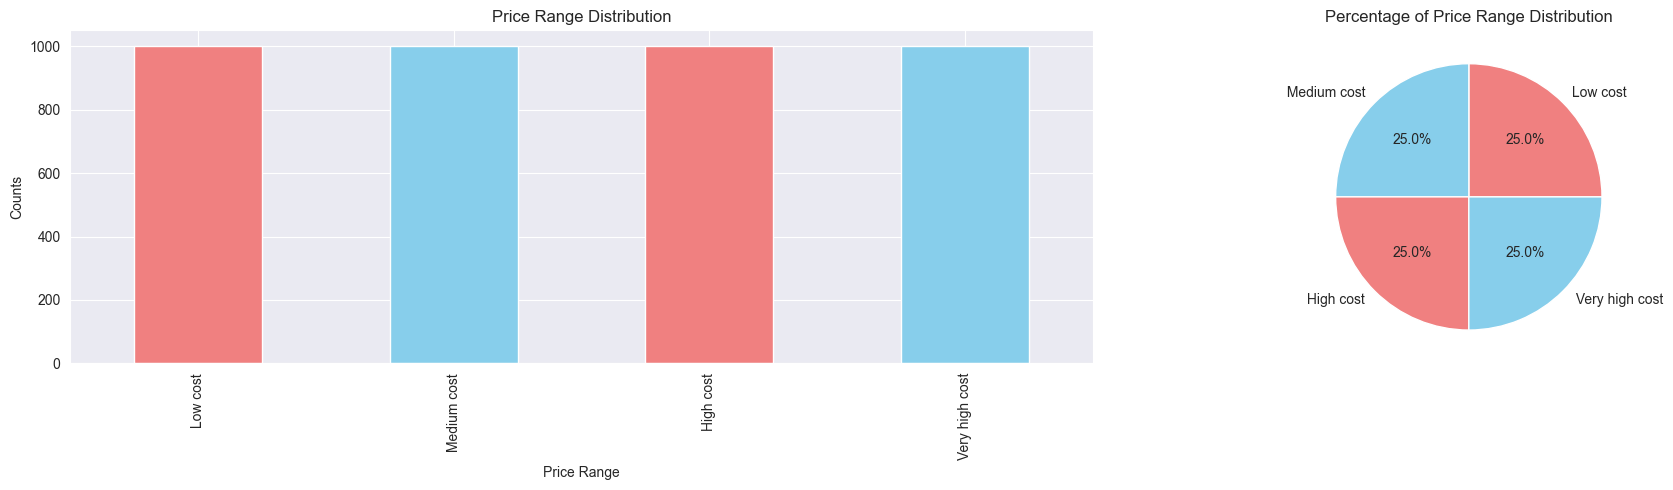

In [12]:
price_range_value = df_mobile_data['price_range'].value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
price_range_value.plot(kind='bar', ax=ax1, color=['lightcoral', 'skyblue'])
ax1.set_title('Price Range Distribution')
ax1.set_xlabel('Price Range')
ax1.set_xticks(range(len(price_range_value)))
ax1.set_xticklabels(['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
ax1.set_ylabel('Counts')

ax2.pie(price_range_value.values, labels=['Low cost', ' Medium cost', ' High cost', ' Very high cost'],
autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
ax2.set_title('Percentage of Price Range Distribution')
plt.tight_layout()
plt.show()

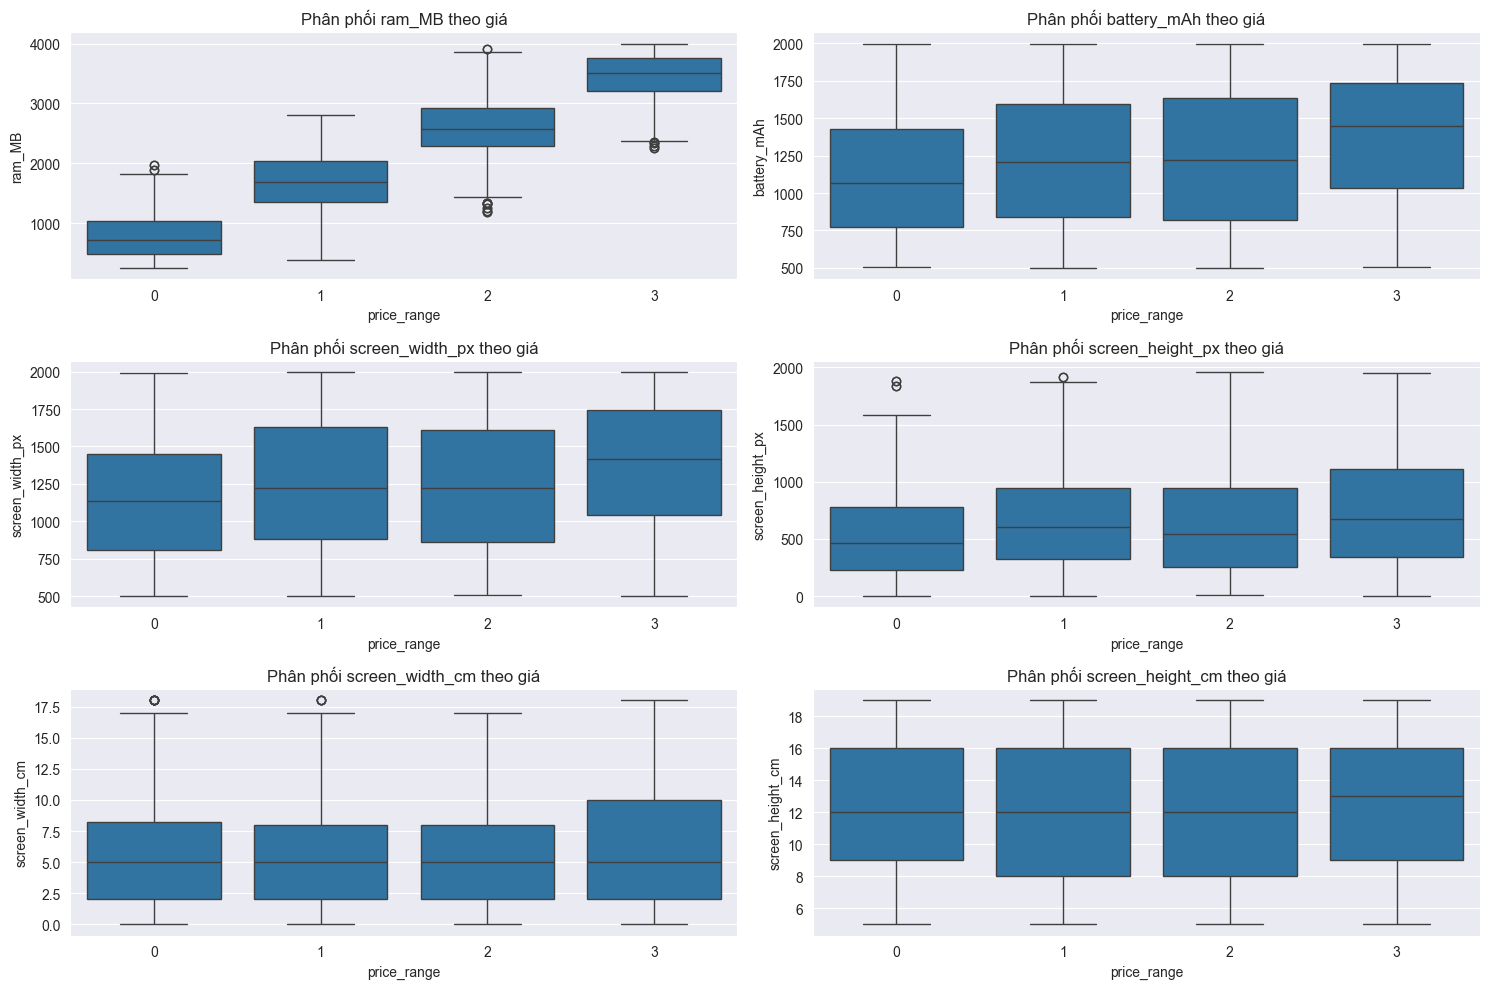

In [13]:
cols = ['ram_MB', 'battery_mAh', 'screen_width_px', 'screen_height_px', 'screen_width_cm', 'screen_height_cm']

fig, axes = plt.subplots(3,2, figsize=(15,10))
axes = axes.ravel()

for i, feature in enumerate(cols):
    sns.boxplot(data = df_mobile_data, x = 'price_range', y = feature, ax = axes[i])
    axes[i].set_title(f'Phân phối {feature} theo giá')

plt.tight_layout()
plt.show()

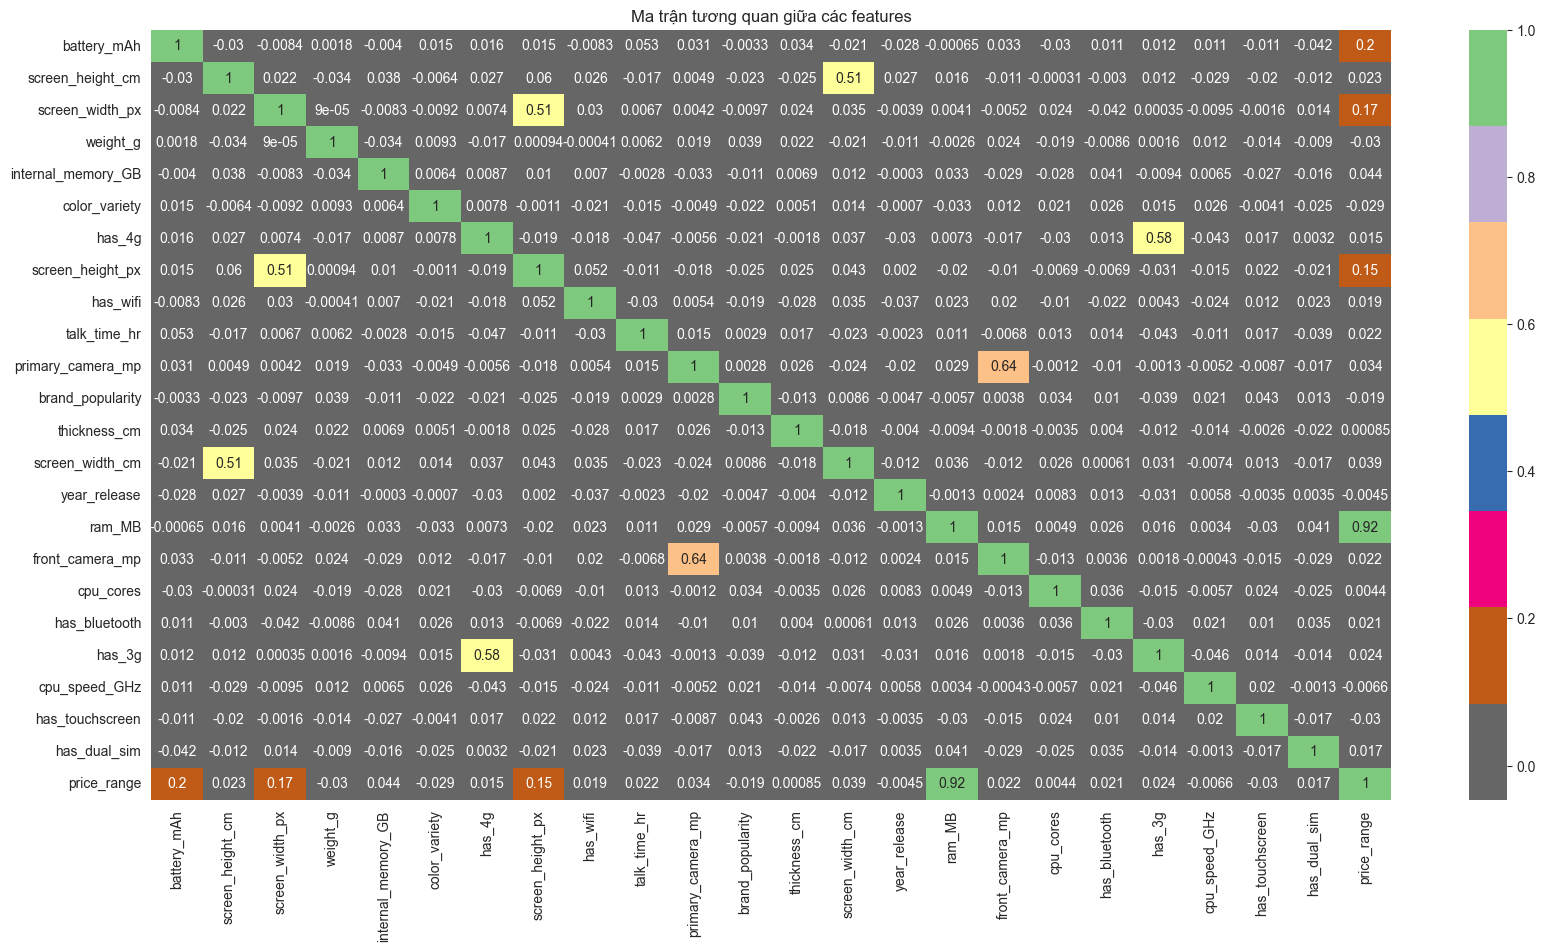

TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:
ram_MB: 0.917
battery_mAh: 0.201
screen_width_px: 0.166
screen_height_px: 0.149
internal_memory_GB: 0.044
screen_width_cm: 0.039
primary_camera_mp: 0.034
has_3g: 0.024
screen_height_cm: 0.023
front_camera_mp: 0.022
talk_time_hr: 0.022
has_bluetooth: 0.021
has_wifi: 0.019
has_dual_sim: 0.017
has_4g: 0.015
cpu_cores: 0.004
thickness_cm: 0.001
year_release: -0.005
cpu_speed_GHz: -0.007
brand_popularity: -0.019
color_variety: -0.029
weight_g: -0.030
has_touchscreen: -0.030


In [14]:
plt.figure(figsize=(20, 10))
correlation_matrix = df_mobile_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Accent_r)
plt.title('Ma trận tương quan giữa các features')
plt.show()
print("TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:")
target_corr = correlation_matrix['price_range'].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'price_range':
        print(f"{feature}: {corr:.3f}")

In [15]:
#For the values in the columns screen_width_cm and screen_height_px, the minimum value is 0. However, the width or pixel dimensions of a screen cannot realistically be 0. Therefore, we will drop invalid entries in the screen_height_px column and use Nearest Neighbors Imputation (KNNImputer) to fill in the missing values.

In [16]:
#Checking how many observations having screen_height_px value as 0
#print(df_mobile_data[df_mobile_data['screen_height_px']==0].shape[0])
#OR
df_mobile_data['screen_height_px'].value_counts().sort_index()

screen_height_px
0       4
1       2
2       2
3       4
4       6
       ..
1901    2
1914    2
1920    2
1949    2
1960    2
Name: count, Length: 1137, dtype: int64

In [17]:
#As there are only 4 observations having screen_height_px = 0. So we will drop it.

df_mobile_data = df_mobile_data[df_mobile_data['screen_height_px'] != 0]

In [18]:
print(df_mobile_data[df_mobile_data['screen_height_px'] == 0].shape[0])

0


In [19]:
#Checking how many observations having screen_width_cm value as 0
print(df_mobile_data['screen_width_cm'].value_counts().sort_index())
#OR
#print(df_mobile_data[df_mobile_data['screen_width_cm']==0].shape[0])

screen_width_cm
0     358
1     420
2     312
3     398
4     364
5     320
6     260
7     264
8     250
9     194
10    214
11    168
12    136
13     98
14     66
15     62
16     58
17     38
18     16
Name: count, dtype: int64


In [20]:
#- Before using KNNImputer we need to replace 0 with NAN values. So that it will work
# Replacing 0 with NAN so that we can implement KNNImputer
df_mobile_data['screen_width_cm'] = df_mobile_data['screen_width_cm'].replace(0, np.nan)

In [21]:
#Checking columns['screen_width_cm'] having value NAN
df_mobile_data['screen_width_cm'].isna().sum()

np.int64(358)

In [22]:
#Import KNNImputer from sklearn
from sklearn.impute import KNNImputer

impute_knn_value = KNNImputer(n_neighbors=1)
df_mobile_data = pd.DataFrame(impute_knn_value.fit_transform(df_mobile_data), columns = df_mobile_data.columns)

In [23]:
#Checking shape dataset
df_mobile_data.shape

(3996, 24)

In [24]:
#Checking how many observations having 'screen_width_cm' value as 0
df_mobile_data[df_mobile_data['screen_width_cm']==0].shape[0]

0

In [25]:
#Cheking the datatypes, non-null values after we were using KNNImputer for values
df_mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_mAh         3996 non-null   float64
 1   screen_height_cm    3996 non-null   float64
 2   screen_width_px     3996 non-null   float64
 3   weight_g            3996 non-null   float64
 4   internal_memory_GB  3996 non-null   float64
 5   color_variety       3996 non-null   float64
 6   has_4g              3996 non-null   float64
 7   screen_height_px    3996 non-null   float64
 8   has_wifi            3996 non-null   float64
 9   talk_time_hr        3996 non-null   float64
 10  primary_camera_mp   3996 non-null   float64
 11  brand_popularity    3996 non-null   float64
 12  thickness_cm        3996 non-null   float64
 13  screen_width_cm     3996 non-null   float64
 14  year_release        3996 non-null   float64
 15  ram_MB              3996 non-null   float64
 16  front_

In [26]:
#Checking Null values
df_mobile_data.isnull().sum()

battery_mAh           0
screen_height_cm      0
screen_width_px       0
weight_g              0
internal_memory_GB    0
color_variety         0
has_4g                0
screen_height_px      0
has_wifi              0
talk_time_hr          0
primary_camera_mp     0
brand_popularity      0
thickness_cm          0
screen_width_cm       0
year_release          0
ram_MB                0
front_camera_mp       0
cpu_cores             0
has_bluetooth         0
has_3g                0
cpu_speed_GHz         0
has_touchscreen       0
has_dual_sim          0
price_range           0
dtype: int64

In [27]:
#Checking Duplicated values in data set
df_mobile_data.duplicated().sum()
df_mobile_data[df_mobile_data.duplicated(keep=False)].sort_values(by=list(df_mobile_data.columns))

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
1851,648.0,10.0,1811.0,195.0,60.0,2.0,1.0,931.0,0.0,4.0,...,2020.0,819.0,1.0,4.0,1.0,1.0,1.8,0.0,0.0,0.0
3849,648.0,10.0,1811.0,195.0,60.0,2.0,1.0,931.0,0.0,4.0,...,2020.0,819.0,1.0,4.0,1.0,1.0,1.8,0.0,0.0,0.0
203,671.0,6.0,1182.0,105.0,30.0,1.0,0.0,852.0,0.0,15.0,...,2023.0,2504.0,10.0,7.0,0.0,1.0,0.9,0.0,1.0,2.0
2201,671.0,6.0,1182.0,105.0,30.0,1.0,0.0,852.0,0.0,15.0,...,2023.0,2504.0,10.0,7.0,0.0,1.0,0.9,0.0,1.0,2.0
182,1082.0,6.0,1191.0,198.0,38.0,3.0,0.0,986.0,1.0,17.0,...,2019.0,2337.0,0.0,8.0,0.0,0.0,0.8,1.0,0.0,2.0
2180,1082.0,6.0,1191.0,198.0,38.0,3.0,0.0,986.0,1.0,17.0,...,2019.0,2337.0,0.0,8.0,0.0,0.0,0.8,1.0,0.0,2.0
374,1334.0,10.0,1974.0,115.0,42.0,5.0,1.0,1187.0,0.0,8.0,...,2015.0,2542.0,5.0,5.0,1.0,1.0,2.4,0.0,0.0,3.0
2372,1334.0,10.0,1974.0,115.0,42.0,5.0,1.0,1187.0,0.0,8.0,...,2015.0,2542.0,5.0,5.0,1.0,1.0,2.4,0.0,0.0,3.0
228,1578.0,19.0,1226.0,138.0,37.0,3.0,1.0,411.0,1.0,3.0,...,2020.0,2458.0,2.0,4.0,0.0,1.0,1.9,0.0,1.0,2.0
2226,1578.0,19.0,1226.0,138.0,37.0,3.0,1.0,411.0,1.0,3.0,...,2020.0,2458.0,2.0,4.0,0.0,1.0,1.9,0.0,1.0,2.0


In [28]:
#Remove duplicated rows
df_mobile_data = df_mobile_data.drop_duplicates(keep='first')
df_mobile_data.duplicated().sum()

np.int64(0)

In [29]:
df_mobile_data.shape[0]

3989

Dữ liệu gốc: (3989, 24)
📊 Các cột số được kiểm tra outlier: ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g', 'internal_memory_GB', 'color_variety', 'screen_height_px', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity', 'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB', 'front_camera_mp', 'cpu_cores', 'cpu_speed_GHz', 'price_range']
Kích thước ban đầu: (3989, 24)

🔹 battery_mAh:
   Q1 = 851.00, Q3 = 1615.00, IQR = 764.00
   Ngưỡng dưới = -295.00, trên = 2761.00
   Đã loại 0 hàng (0.00%)

🔹 screen_height_cm:
   Q1 = 9.00, Q3 = 16.00, IQR = 7.00
   Ngưỡng dưới = -1.50, trên = 26.50
   Đã loại 0 hàng (0.00%)

🔹 screen_width_px:
   Q1 = 874.00, Q3 = 1633.00, IQR = 759.00
   Ngưỡng dưới = -264.50, trên = 2771.50
   Đã loại 0 hàng (0.00%)

🔹 weight_g:
   Q1 = 109.00, Q3 = 170.00, IQR = 61.00
   Ngưỡng dưới = 17.50, trên = 261.50
   Đã loại 0 hàng (0.00%)

🔹 internal_memory_GB:
   Q1 = 16.00, Q3 = 48.00, IQR = 32.00
   Ngưỡng dưới = -32.00, trên = 96.00
   Đã 

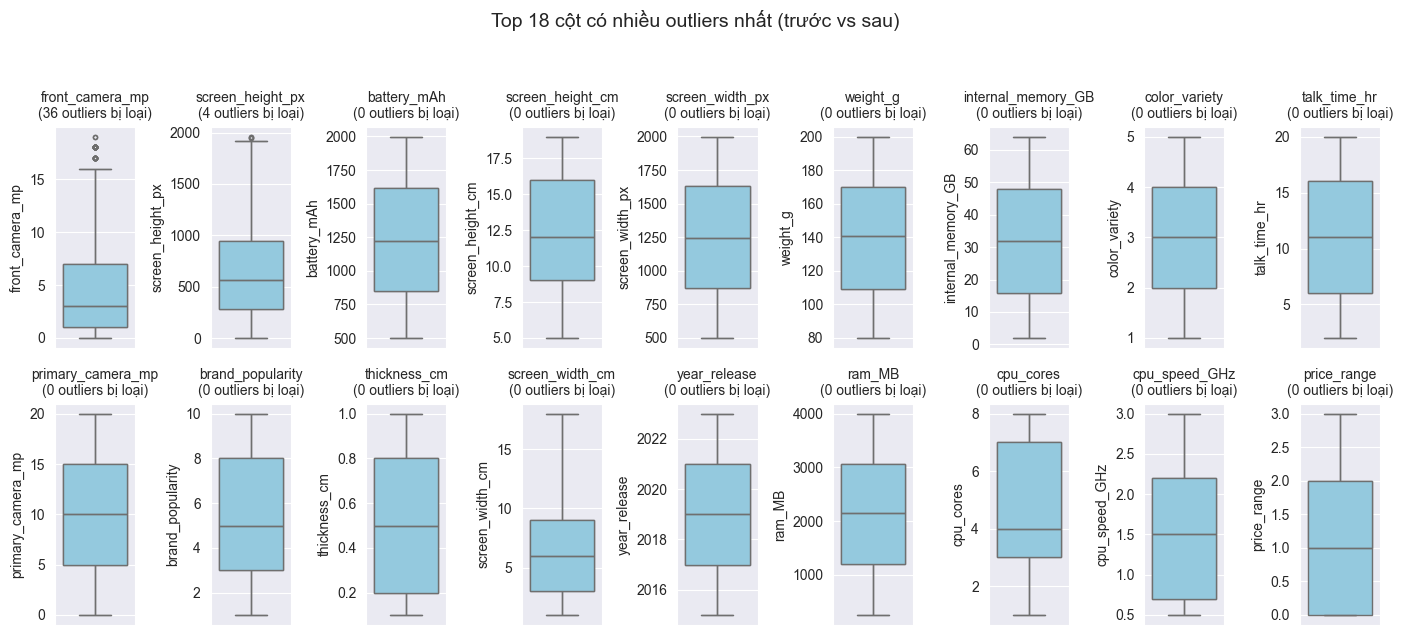


Dữ liệu sau khi loại outliers: (3949, 24)


In [30]:
def handle_outliers_iqr(df_mobile_data, top_n=10, verbose=True):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Sao lưu để đảm bảo an toàn (có thể bỏ nếu muốn chỉnh trực tiếp)
    df_clean = df_mobile_data.copy()

    # Chỉ lấy các cột số, loại trừ các cột nhị phân (0/1)
    binary_cols = [
        'has_3g', 'has_4g', 'has_wifi', 'has_bluetooth',
        'has_touchscreen', 'has_dual_sim'
    ]
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in binary_cols]

    if verbose:
        print("📊 Các cột số được kiểm tra outlier:", list(numeric_cols))
        print("Kích thước ban đầu:", df_clean.shape)

    outlier_counts = {}

    # Xử lý từng cột bằng IQR
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Tạo mask cho các giá trị ngoại lai
        mask_outliers = (df_clean[col] < lower) | (df_clean[col] > upper)
        num_outliers = mask_outliers.sum()
        outlier_counts[col] = num_outliers

        # Loại bỏ các outlier
        df_clean = df_clean[~mask_outliers]

        if verbose:
            print(f"\n🔹 {col}:")
            print(f"   Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
            print(f"   Ngưỡng dưới = {lower:.2f}, trên = {upper:.2f}")
            print(f"   Đã loại {num_outliers} hàng ({num_outliers / len(df_mobile_data) * 100:.2f}%)")

    if verbose:
        print("\n✅ Dữ liệu sau khi loại outliers:", df_clean.shape)

    # Hiển thị các cột có nhiều outlier nhất
    top_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_cols = [col for col, _ in top_outliers]

    # Vẽ boxplot trước và sau
    if len(top_cols) > 0:
        plt.figure(figsize=(14, 6))
        plt.suptitle(f"Top {len(top_cols)} cột có nhiều outliers nhất (trước vs sau)", fontsize=14, y=1.05)

        for i, col in enumerate(top_cols):
            plt.subplot(2, len(top_cols)//2 + len(top_cols)%2, i+1)
            sns.boxplot(y=df_mobile_data[col], color='salmon', fliersize=3)
            sns.boxplot(y=df_clean[col], color='skyblue', fliersize=3)
            plt.title(f"{col}\n({outlier_counts[col]} outliers bị loại)", fontsize=10)
            plt.xticks([])

        plt.tight_layout()
        plt.show()

    return df_clean
print("Dữ liệu gốc:", df_mobile_data.shape)
df_clean = handle_outliers_iqr(df_mobile_data, top_n=20, verbose=True)
print("\nDữ liệu sau khi loại outliers:", df_clean.shape)

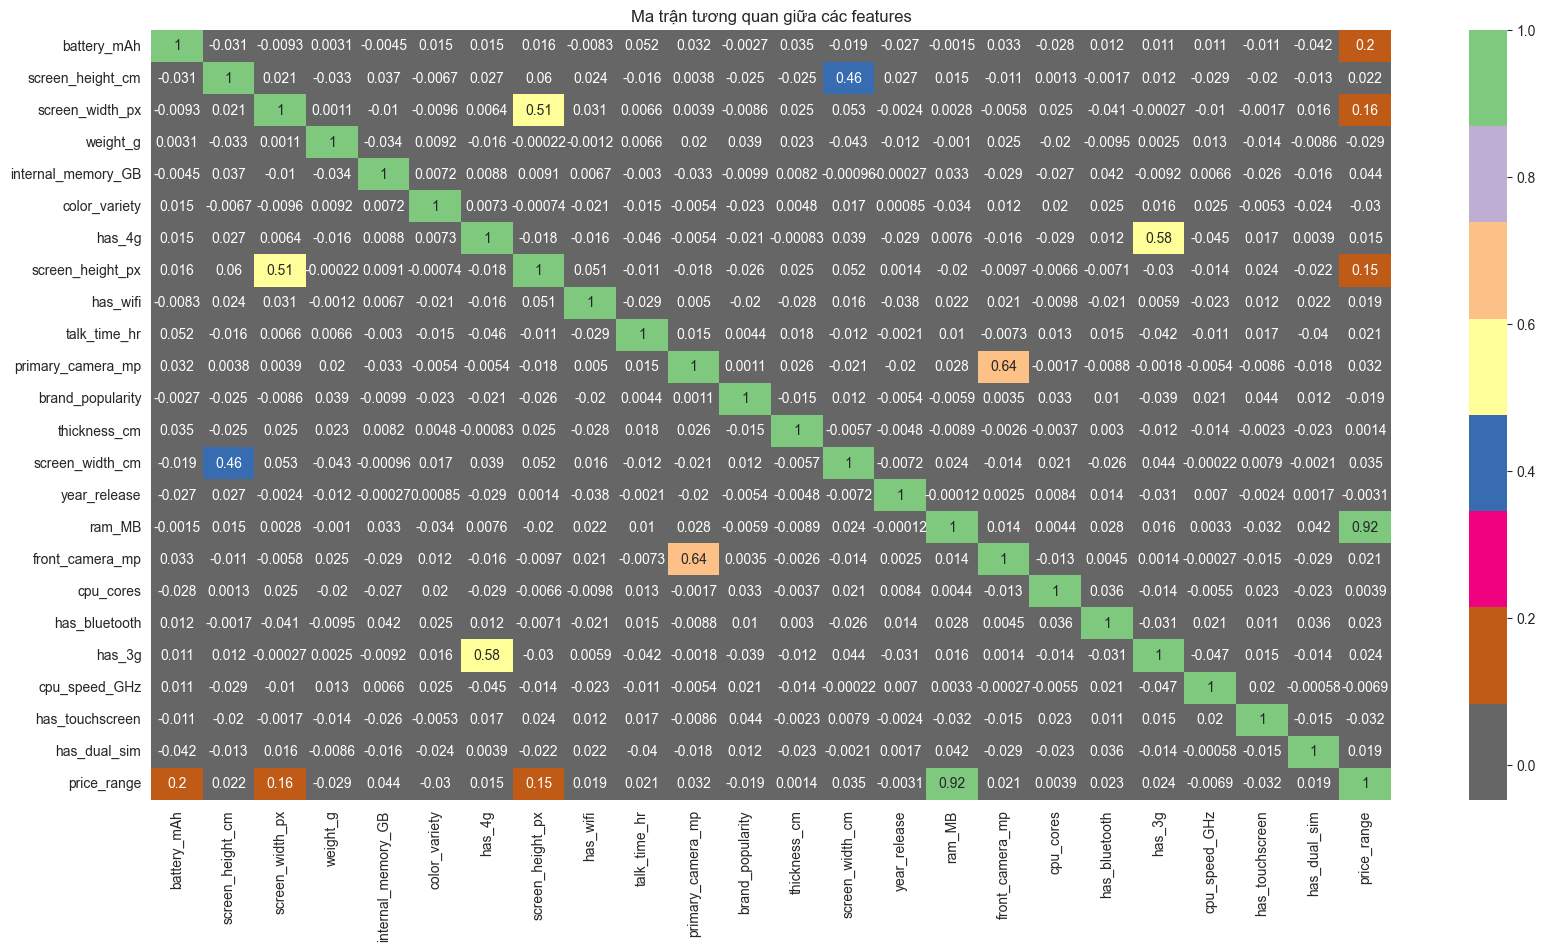

TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:
ram_MB: 0.917
battery_mAh: 0.200
screen_width_px: 0.165
screen_height_px: 0.150
internal_memory_GB: 0.044
screen_width_cm: 0.035
primary_camera_mp: 0.032
has_3g: 0.024
has_bluetooth: 0.023
screen_height_cm: 0.022
talk_time_hr: 0.021
front_camera_mp: 0.021
has_dual_sim: 0.019
has_wifi: 0.019
has_4g: 0.015
cpu_cores: 0.004
thickness_cm: 0.001
year_release: -0.003
cpu_speed_GHz: -0.007
brand_popularity: -0.019
weight_g: -0.029
color_variety: -0.030
has_touchscreen: -0.032


In [31]:
plt.figure(figsize=(20, 10))
correlation_matrix = df_mobile_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Accent_r)
plt.title('Ma trận tương quan giữa các features')
plt.show()
print("TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:")
target_corr = correlation_matrix['price_range'].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'price_range':
        print(f"{feature}: {corr:.3f}")

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
X = df_clean.drop('price_range', axis=1)
y = df_clean['price_range']
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")


Feature shape: (3949, 23)
Target shape: (3949,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"Train set: {X_train.shape[0]}")
print(f"Test set: {X_test.shape[0]}")

Train set: 3159
Test set: 790


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"Mean:", X_train_scaled.mean().round(4))
print("Std:", X_train_scaled.std().round(4))

Mean: battery_mAh          -0.0
screen_height_cm     -0.0
screen_width_px      -0.0
weight_g              0.0
internal_memory_GB   -0.0
color_variety        -0.0
has_4g                0.0
screen_height_px     -0.0
has_wifi             -0.0
talk_time_hr          0.0
primary_camera_mp     0.0
brand_popularity     -0.0
thickness_cm         -0.0
screen_width_cm      -0.0
year_release         -0.0
ram_MB               -0.0
front_camera_mp      -0.0
cpu_cores            -0.0
has_bluetooth        -0.0
has_3g                0.0
cpu_speed_GHz        -0.0
has_touchscreen      -0.0
has_dual_sim          0.0
dtype: float64
Std: battery_mAh           1.0002
screen_height_cm      1.0002
screen_width_px       1.0002
weight_g              1.0002
internal_memory_GB    1.0002
color_variety         1.0002
has_4g                1.0002
screen_height_px      1.0002
has_wifi              1.0002
talk_time_hr          1.0002
primary_camera_mp     1.0002
brand_popularity      1.0002
thickness_cm          1.0002

Training Accuracy: 1.00000 (100.00%)
Testing Accuracy: 0.96456 (96.46%)
Cross-Validation: 0.9297 ± 0.0021
Số đặc trưng mô hình học: 23
Tên các đặc trưng: ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g', 'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px', 'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity', 'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB', 'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g', 'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim']
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       198
         1.0       0.96      0.94      0.95       198
         2.0       0.94      0.94      0.94       198
         3.0       0.97      0.98      0.98       196

    accuracy                           0.96       790
   macro avg       0.96      0.96      0.96       790
weighted avg       0.96      0.96      0.96       790



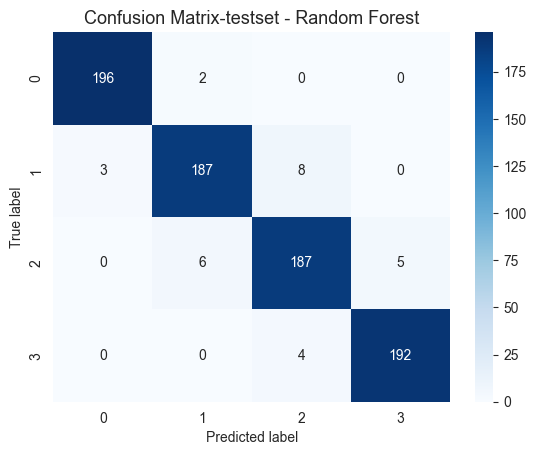

In [36]:
from sklearn.tree import DecisionTreeClassifier

#Creating object of the decision tree.
dtc_tree_model = DecisionTreeClassifier(random_state=42)
dtc_tree_model.fit(X_train, y_train)
y_train_predict = dtc_tree_model.predict(X_train)
y_test_predict = dtc_tree_model.predict(X_test)

dtc_train_acc = accuracy_score(y_train, y_train_predict)
dtc_test_acc = accuracy_score(y_test, y_test_predict)
dtc_cv_scores = cross_val_score(dtc_tree_model, X_train, y_train, cv=5)

print(f"Training Accuracy: {dtc_train_acc:.5f} ({dtc_train_acc:.2%})")
print(f"Testing Accuracy: {dtc_test_acc:.5f} ({dtc_test_acc:.2%})")
print(f"Cross-Validation: {dtc_cv_scores.mean():.4f} ± {dtc_cv_scores.std():.4f}")

print("Số đặc trưng mô hình học:", X_train.shape[1])
print("Tên các đặc trưng:", list(X.columns))
print(classification_report(y_test, y_test_predict))

sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix-testset - Random Forest", fontsize=13)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [37]:
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

dtc_tree_model_2 = DecisionTreeClassifier(random_state=42)
grid_values = {
             'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['sqrt','log2',None]
}
dtc_tune=GridSearchCV(dtc_tree_model_2,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.434 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.456 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.468 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.486 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.488 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.269 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.241 total time=   0.0s
[CV 3/5] END criterion=gini, 

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [3, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [38]:
dtc_tune.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

Training Accuracy: 1.00000 (100.00%)
Testing Accuracy: 0.96456 (96.46%)
Cross-Validation: 0.9297 ± 0.0021
Số đặc trưng mô hình học: 23
Tên các đặc trưng: ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g', 'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px', 'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity', 'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB', 'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g', 'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim']
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       198
         1.0       0.96      0.94      0.95       198
         2.0       0.94      0.94      0.94       198
         3.0       0.97      0.98      0.98       196

    accuracy                           0.96       790
   macro avg       0.96      0.96      0.96       790
weighted avg       0.96      0.96      0.96       790



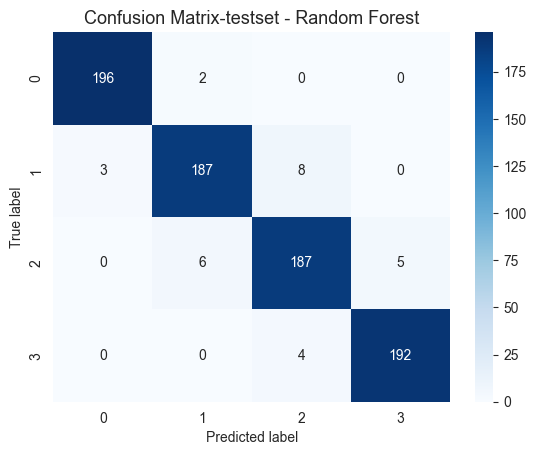

In [39]:
dtc_optimal = DecisionTreeClassifier(
    criterion= 'gini',
    max_depth= 12,
    max_features= None,
    min_samples_split= 3,
    random_state= 0
)
dtc_tree_model.fit(X_train, y_train)
y_train_predict = dtc_tree_model.predict(X_train)
y_test_predict = dtc_tree_model.predict(X_test)

dtc_train_acc = accuracy_score(y_train, y_train_predict)
dtc_test_acc = accuracy_score(y_test, y_test_predict)
dtc_cv_scores = cross_val_score(dtc_tree_model, X_train, y_train, cv=5)

print(f"Training Accuracy: {dtc_train_acc:.5f} ({dtc_train_acc:.2%})")
print(f"Testing Accuracy: {dtc_test_acc:.5f} ({dtc_test_acc:.2%})")
print(f"Cross-Validation: {dtc_cv_scores.mean():.4f} ± {dtc_cv_scores.std():.4f}")

print("Số đặc trưng mô hình học:", X_train.shape[1])
print("Tên các đặc trưng:", list(X.columns))
print(classification_report(y_test, y_test_predict))

sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix-testset - Random Forest", fontsize=13)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Training Accuracy: 0.80405 (80.41%)
Testing Accuracy: 0.62405 (62.41%)
Cross-Validation: 0.5973 ± 0.0163
Số đặc trưng mô hình học: 23
Tên các đặc trưng: ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g', 'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px', 'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity', 'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB', 'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g', 'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim']
              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       198
         1.0       0.50      0.49      0.50       198
         2.0       0.55      0.60      0.57       198
         3.0       0.88      0.62      0.72       196

    accuracy                           0.62       790
   macro avg       0.64      0.62      0.63       790
weighted avg       0.64      0.62      0.63       790



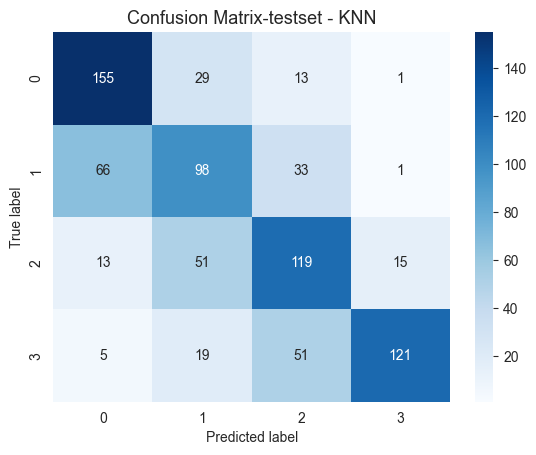

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#Creating an object of the classifier
knn_neighbors = KNeighborsClassifier()
knn_neighbors.fit(X_train_scaled, y_train)

y_train_pred_knn = knn_neighbors.predict(X_train_scaled)
y_test_pred_knn = knn_neighbors.predict(X_test_scaled)


knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)
knn_cv_scores = cross_val_score(knn_neighbors, X_train_scaled, y_train, cv=5)

print(f"Training Accuracy: {knn_train_acc:.5f} ({knn_train_acc:.2%})")
print(f"Testing Accuracy: {knn_test_acc:.5f} ({knn_test_acc:.2%})")
print(f"Cross-Validation: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")

print("Số đặc trưng mô hình học:", X_train_scaled.shape[1])
print("Tên các đặc trưng:", list(X.columns))
print(classification_report(y_test, y_test_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix-testset - KNN", fontsize=13)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#

In [41]:
knn = KNeighborsClassifier()
grid_values = {'n_neighbors':list(range(1,30))}
knn_tune = GridSearchCV(knn, cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.764 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.788 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.780 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.794 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.788 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.585 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.623 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.573 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.593 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.601 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.554 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [42]:
knn_tune.best_params_

{'n_neighbors': 1}

Training Accuracy: 1.00000 (100.00%)
Testing Accuracy: 0.85063 (85.06%)
Cross-Validation: 0.7828 ± 0.0103
Số đặc trưng mô hình học: 23
Tên các đặc trưng: ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g', 'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px', 'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity', 'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB', 'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g', 'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim']
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       198
         1.0       0.80      0.80      0.80       198
         2.0       0.81      0.86      0.83       198
         3.0       0.92      0.86      0.89       196

    accuracy                           0.85       790
   macro avg       0.85      0.85      0.85       790
weighted avg       0.85      0.85      0.85       790



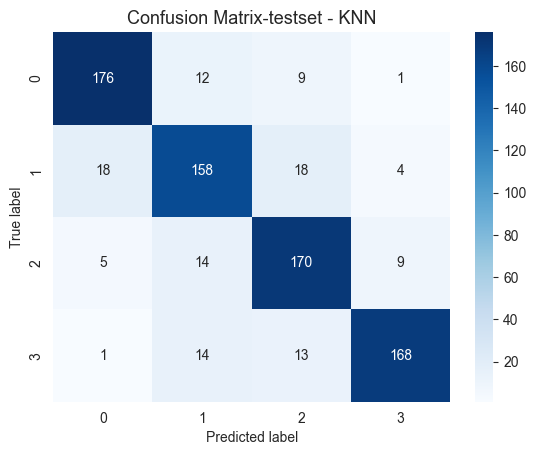

In [43]:
knn_optimal = KNeighborsClassifier(n_neighbors=1)
knn_optimal.fit(X_train_scaled,y_train)
y_train_pred = knn_optimal.predict(X_train_scaled)
y_test_pred = knn_optimal.predict(X_test_scaled)

knn_train_acc = accuracy_score(y_train, y_train_pred)
knn_test_acc = accuracy_score(y_test, y_test_pred)
knn_cv_scores = cross_val_score(knn_optimal, X_train_scaled, y_train, cv=5)

print(f"Training Accuracy: {knn_train_acc:.5f} ({knn_train_acc:.2%})")
print(f"Testing Accuracy: {knn_test_acc:.5f} ({knn_test_acc:.2%})")
print(f"Cross-Validation: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")

print("Số đặc trưng mô hình học:", X_train_scaled.shape[1])
print("Tên các đặc trưng:", list(X.columns))
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix-testset - KNN", fontsize=13)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()